Before we start working with various models, always have in mind definition of the model! 

We start with examples of some common ML predictive models. For implementation, sklearn library can be used 

In [20]:
import pandas as pd
import numpy as np

from sklearn import datasets
# for logistic regression
import sklearn.linear_model as sk
from sklearn.svm import SVC, LinearSVC

from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import preprocessing
# for CV
from sklearn.model_selection import train_test_split,  cross_val_score, KFold, GridSearchCV

Think about a situation when we have a classification problem and don't which model fits best and want to try a few models for the same data. Then it is convenient to define all models in a dictionary 

In [21]:
my_models = [
{
        'label': 'Logistic Regression',
        'model': sk.LogisticRegression()
 },
 {
        'label': 'Elastic net',
        'model':  SGDClassifier(loss='log_loss', penalty='elasticnet')
},
   
{
        'label': 'KNN',
        'model': KNN()
},
{
        'label': 'Decision tree',
        'model': DecisionTreeClassifier()
},
{
        'label': 'Random Forest',
        'model': RandomForestClassifier(max_features = 'sqrt')
},
{
        # C is the penalty
        'label': 'Linear SVM',
        'model': SVC(kernel= 'linear', C = 1, probability =  True)
},
]

In [22]:
my_models[0]

{'label': 'Logistic Regression', 'model': LogisticRegression()}

Import some data and define a classification problem. In this example, we have various data from customers who were offered the vehicle coupon, and the target variable indicating if they accepted it or not. Hence, we have a binary classification problem

In [23]:
# this data has to be downloaded from kaggle
coupon_data = pd.read_csv('data/in-vehicle-coupon-recommendation.csv')
coupon_data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


Do some preprocessing first

In [24]:
y = coupon_data.Y
X = coupon_data.drop(['Y'], axis=1)

# Divide data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

# Drop columns with missing values 
cols_with_missing = [col for col in X_train.columns if X_train[col].isnull().any()] 
X_train.drop(cols_with_missing, axis=1, inplace=True)
X_test.drop(cols_with_missing, axis=1, inplace=True)

In [25]:
X.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,0,0,0,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,0,0,0,1
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,1,0,0,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,1,0,0,1
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,1,0,0,1


In [26]:
X_train.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
11138,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,50plus,Single,0,Bachelors degree,Management,$100000 or More,1,0,0,1,0
3600,Work,Alone,Sunny,55,7AM,Restaurant(<20),1d,Male,41,Married partner,0,Graduate degree (Masters or Doctorate),Management,$100000 or More,1,0,0,0,1
10056,No Urgent Place,Friend(s),Sunny,80,10PM,Coffee House,1d,Female,50plus,Single,1,Some college - no degree,Unemployed,Less than $12500,1,1,0,0,1
5389,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Business & Financial,$100000 or More,1,0,0,1,0
5369,No Urgent Place,Alone,Sunny,80,10AM,Bar,1d,Male,26,Single,0,Bachelors degree,Business & Financial,$100000 or More,1,0,0,0,1


Let's take a closer look at the columns with categorical data

In [27]:
# Get list of categorical variables: 
# for each feature, assign True if its of type "object" and False otherwise
s = (X_train.dtypes == 'object')
# get the index of the columns
print(s)
s[s]

destination           True
passanger             True
weather               True
temperature          False
time                  True
coupon                True
expiration            True
gender                True
age                   True
maritalStatus         True
has_children         False
education             True
occupation            True
income                True
toCoupon_GEQ5min     False
toCoupon_GEQ15min    False
toCoupon_GEQ25min    False
direction_same       False
direction_opp        False
dtype: bool


destination      True
passanger        True
weather          True
time             True
coupon           True
expiration       True
gender           True
age              True
maritalStatus    True
education        True
occupation       True
income           True
dtype: bool

In [28]:
object_cols = list(s[s].index)

# print all categorical variables
print(object_cols)

['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'education', 'occupation', 'income']


Ways to encode categorical features in Python: Ordinal Encoding VS One-hot encoding

In [29]:
from sklearn.preprocessing import OrdinalEncoder

# Make a deep copy to avoid changing original data 
label_X_train = X_train.copy()
label_X_test = X_test.copy()

# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
label_X_train[object_cols] = ordinal_encoder.fit_transform(X_train[object_cols])
label_X_test[object_cols] = ordinal_encoder.transform(X_test[object_cols])

label_X_train.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
11138,0.0,0.0,2.0,80,3.0,3.0,0.0,1.0,6.0,2.0,0,1.0,15.0,0.0,1,0,0,1,0
3600,2.0,0.0,2.0,55,4.0,4.0,0.0,1.0,4.0,1.0,0,2.0,15.0,0.0,1,0,0,0,1
10056,1.0,1.0,2.0,80,1.0,2.0,0.0,0.0,6.0,2.0,1,5.0,24.0,8.0,1,1,0,0,1
5389,2.0,0.0,2.0,80,4.0,1.0,0.0,1.0,1.0,2.0,0,1.0,3.0,0.0,1,0,0,1,0
5369,1.0,0.0,2.0,80,0.0,0.0,0.0,1.0,1.0,2.0,0,1.0,3.0,0.0,1,0,0,0,1


In [30]:
X_train.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
11138,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,50plus,Single,0,Bachelors degree,Management,$100000 or More,1,0,0,1,0
3600,Work,Alone,Sunny,55,7AM,Restaurant(<20),1d,Male,41,Married partner,0,Graduate degree (Masters or Doctorate),Management,$100000 or More,1,0,0,0,1
10056,No Urgent Place,Friend(s),Sunny,80,10PM,Coffee House,1d,Female,50plus,Single,1,Some college - no degree,Unemployed,Less than $12500,1,1,0,0,1
5389,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Business & Financial,$100000 or More,1,0,0,1,0
5369,No Urgent Place,Alone,Sunny,80,10AM,Bar,1d,Male,26,Single,0,Bachelors degree,Business & Financial,$100000 or More,1,0,0,0,1


So the original encoder simply mapped categories into integers. But it's not the best way to encode. Look at the maps: why is Sunny (2) has the higher value than rainy or snowy (0 and 1)? Or why is married partner (0) is less than Single (1)? This may lead to misinterpretation of dependencies. 

In [31]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
ohe = OneHotEncoder(sparse_output=False)

# when applying fit_transform using OHE, it returns a numpy array. Remember to transform it into a data frame
OH_cols_train = pd.DataFrame(ohe.fit_transform(X_train[object_cols]))
OH_cols_test = pd.DataFrame(ohe.fit_transform(X_test[object_cols]))

OH_cols_train.columns = ohe.get_feature_names_out(object_cols)
OH_cols_test.columns = ohe.get_feature_names_out(object_cols)


In [32]:
OH_cols_train.index

RangeIndex(start=0, stop=10147, step=1)

Try One-hot encoding

In [33]:

# the indices were removed by OHE, put them back
OH_cols_train.index = X_train.index
OH_cols_test.index = X_test.index

# Remove categorical columns 
num_X_train = X_train.drop(object_cols, axis=1)
num_X_test = X_test.drop(object_cols, axis=1)

# Concat the categorical and numerical features back together
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

Look closely at what exactly one hot encoder does:

In [34]:
OH_X_train.columns

Index(['temperature', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp',
       'destination_Home', 'destination_No Urgent Place', 'destination_Work',
       'passanger_Alone', 'passanger_Friend(s)', 'passanger_Kid(s)',
       'passanger_Partner', 'weather_Rainy', 'weather_Snowy', 'weather_Sunny',
       'time_10AM', 'time_10PM', 'time_2PM', 'time_6PM', 'time_7AM',
       'coupon_Bar', 'coupon_Carry out & Take away', 'coupon_Coffee House',
       'coupon_Restaurant(20-50)', 'coupon_Restaurant(<20)', 'expiration_1d',
       'expiration_2h', 'gender_Female', 'gender_Male', 'age_21', 'age_26',
       'age_31', 'age_36', 'age_41', 'age_46', 'age_50plus', 'age_below21',
       'maritalStatus_Divorced', 'maritalStatus_Married partner',
       'maritalStatus_Single', 'maritalStatus_Unmarried partner',
       'maritalStatus_Widowed', 'education_Associates degree',
       'education_Bachelors degree',
       'education_Graduat

Instead of assigning each category a number, it creates additional column for each type of the category, with binary labels! 

A simpler example with OHE

In [16]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

train_X = pd.DataFrame({'Sex':['male', 'female']*3, 'AgeGroup':[0,15,30,45,60,75], 'EyeColor':['green', 'blue', 'brown']*2})
train_X

,Sex,AgeGroup,EyeColor
0,male,0,green
1,female,15,blue
2,male,30,brown
3,female,45,green
4,male,60,blue
5,female,75,brown


In [17]:
encoder=OneHotEncoder(sparse_output=False)

train_X_encoded = pd.DataFrame (encoder.fit_transform(train_X[['Sex', 'EyeColor']]))

train_X_encoded.columns = encoder.get_feature_names_out(['Sex', 'EyeColor'])

train_X.drop(['Sex', 'EyeColor'] ,axis=1, inplace=True)

OH_X_train= pd.concat([train_X, train_X_encoded ], axis=1)
OH_X_train

,AgeGroup,Sex_female,Sex_male,EyeColor_blue,EyeColor_brown,EyeColor_green
0,0,0.0,1.0,0.0,0.0,1.0
1,15,1.0,0.0,1.0,0.0,0.0
2,30,0.0,1.0,0.0,1.0,0.0
3,45,1.0,0.0,0.0,0.0,1.0
4,60,0.0,1.0,1.0,0.0,0.0
5,75,1.0,0.0,0.0,1.0,0.0


In [19]:
OH_X_train.shape

(6, 6)

Now let's perform basic classification and look at which of the two encoders worked better for each model

In [35]:
# when selecting model, think of the metric you want to use to evaluate your model
# when working with classification, normally accuracy, precision and recall are used 
# accuracy:  fraction of correctly classified samples 
from sklearn.metrics import accuracy_score
# also might look at precision-recall 
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

for cur_model in my_models:
    # my_models is a dict with model and its label
    model = cur_model['model']
    #model.fit(X_train, y_train)
    model.fit(label_X_train, y_train)
    preds = model.predict(label_X_test)
    # check performance original encoder
    print(cur_model['label'], 'accuracy with original encoder:')
    print(accuracy_score(y_test, preds), '\n')

    # check performance OHE encoder 
    model.fit(OH_X_train, y_train)
    preds = model.predict(OH_X_test)
    print(cur_model['label'], 'accuracy with one-hot encoder:')
    print(accuracy_score(y_test, preds), '\n')


/Users/mac/Uppsala/Semester1/intro-to-data-science/1MS041-2024/data-science-env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mac/Uppsala/Semester1/intro-to-data-science/1MS041-2024/data-science-env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the docum

Logistic Regression accuracy with original encoder:
0.6219944816712653 

Logistic Regression accuracy with one-hot encoder:
0.658651951123374 

Elastic net accuracy with original encoder:
0.5750886874260938 

Elastic net accuracy with one-hot encoder:
0.5620811982656682 

KNN accuracy with original encoder:
0.6227828143476547 

KNN accuracy with one-hot encoder:
0.6621994481671265 

Decision tree accuracy with original encoder:
0.6247536460386283 

Decision tree accuracy with one-hot encoder:
0.6527394560504532 

Random Forest accuracy with original encoder:
0.683878596767836 

Random Forest accuracy with one-hot encoder:
0.7024044146629878 

Linear SVM accuracy with original encoder:
0.579030350808041 

Linear SVM accuracy with one-hot encoder:
0.6598344501379583 



Precision-recall: 

Precision = True Positives / (True Positives + False Positives) 

Recall = True Positives / (True Positives + False Negatives)

Precision measures how many of the “positive” predictions made by the model were correct. Recall measures how many of the positive class samples present in the dataset were correctly identified by the model.

Plot precision-recall curves. Note: We need not only labels, but also probabilities!

Logistic Regression


/Users/mac/Uppsala/Semester1/intro-to-data-science/1MS041-2024/data-science-env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


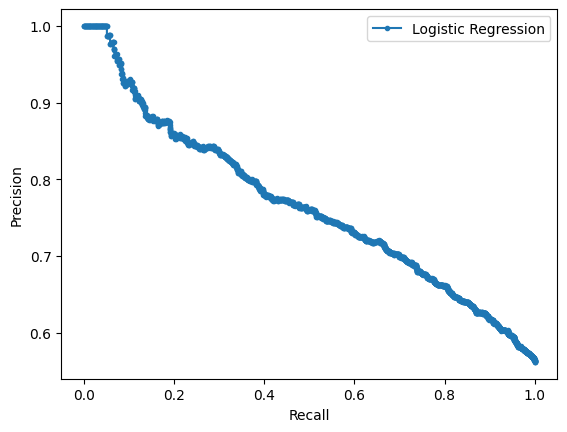

Elastic net


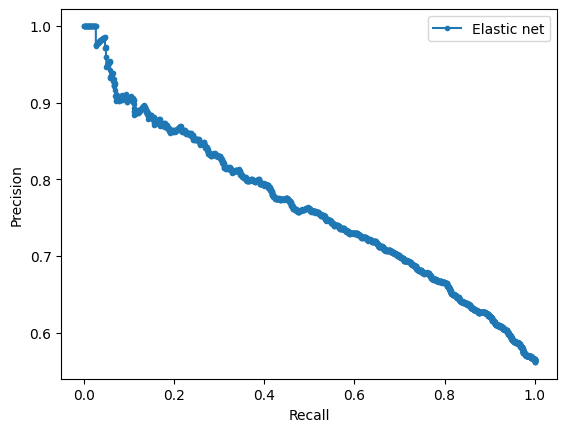

KNN


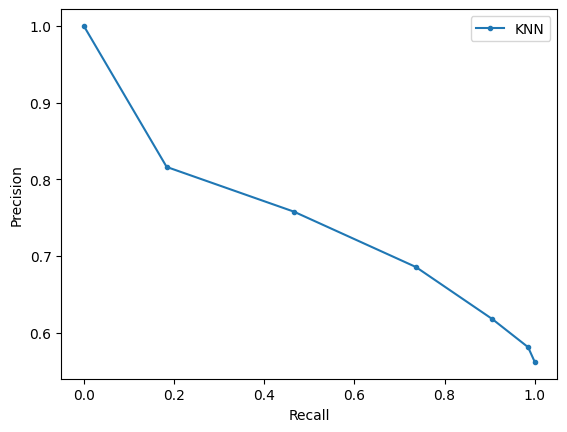

Decision tree


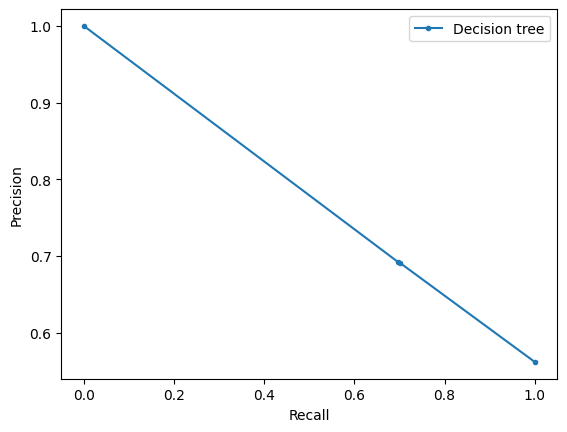

Random Forest


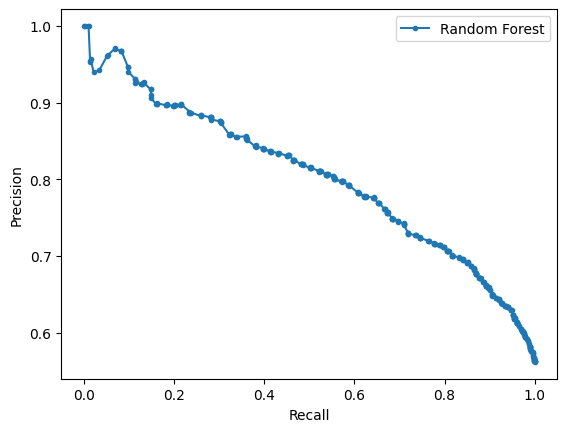

Linear SVM


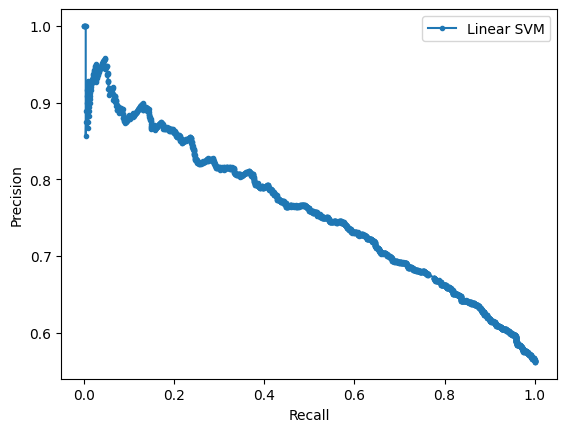

In [36]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

for cur_model in my_models:
    # my_models is a dict with model and its label
    model = cur_model['model']
    print(cur_model['label'])
    #model.fit(X_train, y_train)
    model.fit(OH_X_train, y_train)
    preds = model.predict(OH_X_test)
    y_prob = model.predict_proba(OH_X_test)[:,1]
    # check performance original encoder
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(recall, precision, marker='.', label= cur_model['label'])
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()



'Logistic Regression'

Should we choose precision or recall? Depends on the data and the problem! Usually false negative and false positive outcomes have different costs (for example, in medicine false negative prediction will lead to much more serious consequences than false positive). If the cost of false positive is high, pioritize precision. Otherwise, prioritize recall

Overfitting, cross-validation and grid-search